In [18]:
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
df = pd.read_csv("ny_realtor_listing_sales.csv")
df.head()

,property_url,mls,mls_id,status,style,street,unit,city,state,zip_code,...,last_sold_date,lot_sqft,price_per_sqft,latitude,longitude,stories,hoa_fee,parking_garage,primary_photo,alt_photos
0,https://www.realtor.com/realestateandhomes-det...,CCRN,43a1338a-2c54-41a5-9a33-8f17d27b028a,FOR_SALE,CONDOS,68 Eldert St,# 4C,Brooklyn,NY,11207,...,NaN,4500.0,1070.0,40.686996,-73.912636,NaN,209.0,NaN,http://ap.rdcpix.com/35954ab1c3b9f7b400a1aac3e...,http://ap.rdcpix.com/35954ab1c3b9f7b400a1aac3e...
1,https://www.realtor.com/realestateandhomes-det...,PENY,7757007,FOR_SALE,CONDOS,150 W 51st St,Apt 2116,New York,NY,10019,...,2005-11-14,NaN,1105.0,40.761260,-73.982588,21.0,1555.0,NaN,http://ap.rdcpix.com/c148aad6323bbe93a47eee5cf...,http://ap.rdcpix.com/c148aad6323bbe93a47eee5cf...
2,https://www.realtor.com/realestateandhomes-det...,BONY,478613,FOR_SALE,CONDOS,130 W 79th St,Apt 19B,Manhattan,NY,10024,...,2016-03-01,NaN,2167.0,40.782224,-73.976875,NaN,2185.0,NaN,http://ap.rdcpix.com/962465267131574b4c387cf51...,http://ap.rdcpix.com/962465267131574b4c387cf51...
3,https://www.realtor.com/realestateandhomes-det...,TENY,8846250,FOR_SALE,TOWNHOMES,362 Hawthorne St,Unit Townhouse,Brooklyn,NY,11225,...,NaN,2120.0,NaN,40.657738,-73.948395,3.0,NaN,NaN,http://ap.rdcpix.com/e6a4fa561ab93cef3f6074971...,http://ap.rdcpix.com/e6a4fa561ab93cef3f6074971...
4,https://www.realtor.com/realestateandhomes-det...,OLNY,2070261,FOR_SALE,CONDOS,400 Test St,Unit 231205,New York,NY,10004,...,NaN,NaN,1000000.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [20]:
df.describe()

,zip_code,beds,full_baths,half_baths,sqft,year_built,days_on_mls,list_price,sold_price,lot_sqft,price_per_sqft,latitude,longitude,stories,hoa_fee,parking_garage
count,8753.000000,8458.000000,8423.000000,2243.000000,5645.000000,7987.000000,8753.000000,8.753000e+03,4.900000e+03,4.265000e+03,5645.000000,8651.000000,8651.000000,4784.000000,7157.000000,1339.000000
mean,10778.112533,2.941239,2.067909,1.110120,1852.192205,1954.798673,38.374157,2.023583e+06,9.845051e+05,1.618781e+05,1136.335164,40.717504,-73.931798,7.024666,1073.438871,1.562360
std,589.598819,2.422789,1.639687,0.381204,2061.052552,37.437438,21.367833,2.551012e+07,3.011613e+06,4.790083e+06,13621.012976,0.080780,0.097773,16.987808,2011.108948,2.871897
min,10001.000000,0.000000,1.000000,1.000000,200.000000,1800.000000,0.000000,1.000000e+00,2.000000e+03,1.000000e+02,3.000000,40.499514,-74.254440,1.000000,0.000000,1.000000
25%,10044.000000,1.000000,1.000000,1.000000,900.000000,1925.000000,21.000000,5.500000e+05,2.360000e+05,2.000000e+03,434.000000,40.663111,-73.983277,2.000000,0.000000,1.000000
50%,11201.000000,2.000000,2.000000,1.000000,1378.000000,1951.000000,39.000000,8.950000e+05,4.451000e+05,2.919000e+03,639.000000,40.731551,-73.948082,3.000000,582.000000,1.000000
75%,11355.000000,4.000000,3.000000,1.000000,2250.000000,1984.000000,56.000000,1.575000e+06,8.000000e+05,5.400000e+03,1160.000000,40.767626,-73.859825,6.000000,1230.000000,2.000000
max,11697.000000,36.000000,65.000000,5.000000,65535.000000,2025.000000,76.000000,2.147484e+09,8.400562e+07,2.220158e+08,1000000.000000,40.912747,-73.700859,900.000000,52400.000000,77.000000


Based on the dataset summary above, we identify a few columns which could potentially be used as features in our model training; we make an effort to clean these target columns by removing outliers and ensuring the datatype is appropriate. We also remove rows with NaN values for mentioned columns.

The columns identified as basis for outlier detection and removal are as follows:
* list_price
* sqft
* price_per_sqft
* stories

In [34]:
q1 = df['list_price'].quantile(0.25)
q3 = df['list_price'].quantile(0.75)
iqr = q3 - q1
filtered_df = df.query('(@q1 - 1.5 * @iqr) <= list_price <= (@q3 + 1.5 * @iqr)')
q1 = filtered_df['sqft'].quantile(0.25)
q3 = filtered_df['sqft'].quantile(0.75)
iqr = q3 - q1
filtered_df = filtered_df.query('(@q1 - 1.5 * @iqr) <= sqft <= (@q3 + 1.5 * @iqr)')
q1 = filtered_df['price_per_sqft'].quantile(0.25)
q3 = filtered_df['price_per_sqft'].quantile(0.75)
iqr = q3 - q1
filtered_df = filtered_df.query('(@q1 - 1.5 * @iqr) <= price_per_sqft <= (@q3 + 1.5 * @iqr)')
q1 = filtered_df['stories'].quantile(0.25)
q3 = filtered_df['stories'].quantile(0.75)
iqr = q3 - q1
filtered_df = filtered_df.query('(@q1 - 1.5 * @iqr) <= stories <= (@q3 + 1.5 * @iqr)')
filtered_df = filtered_df.dropna(subset=['sqft', 'list_price', 'price_per_sqft', 'stories', 'year_built'])
filtered_df = filtered_df.dropna(subset=['sqft', 'list_price', 'price_per_sqft', 'stories', 'year_built'])
filtered_df.describe()

,zip_code,beds,full_baths,half_baths,sqft,year_built,days_on_mls,list_price,sold_price,lot_sqft,price_per_sqft,latitude,longitude,stories,hoa_fee,parking_garage
count,2084.000000,2039.000000,2059.000000,686.000000,2084.000000,2084.000000,2084.000000,2.084000e+03,1.309000e+03,1.432000e+03,2084.000000,2064.000000,2064.000000,2084.000000,1589.000000,557.000000
mean,10955.088772,3.110839,1.804274,1.087464,1571.029271,1959.095010,35.923225,8.586177e+05,7.108480e+05,1.169674e+04,573.988484,40.675237,-73.952028,1.976488,358.103210,1.517056
std,487.839172,1.830254,0.998571,0.292865,780.120584,35.758989,21.191803,5.000347e+05,3.314800e+06,5.235113e+04,253.862199,0.089562,0.138603,0.795404,527.489361,2.661708
min,10003.000000,0.000000,1.000000,1.000000,350.000000,1800.000000,0.000000,6.000000e+04,2.000000e+03,1.530000e+02,86.000000,40.499514,-74.252602,1.000000,0.000000,1.000000
25%,10314.000000,2.000000,1.000000,1.000000,923.000000,1930.000000,19.000000,5.280000e+05,2.100000e+05,1.997250e+03,400.750000,40.606421,-74.083622,1.000000,0.000000,1.000000
50%,11220.000000,3.000000,2.000000,1.000000,1400.000000,1955.000000,34.000000,7.490000e+05,3.498300e+05,2.600000e+03,502.000000,40.663554,-73.923328,2.000000,0.000000,1.000000
75%,11362.000000,4.000000,2.000000,1.000000,2080.500000,1987.000000,53.000000,1.099225e+06,5.450000e+05,4.200000e+03,683.000000,40.748826,-73.837406,3.000000,614.000000,2.000000
max,11694.000000,14.000000,8.000000,3.000000,3662.000000,2024.000000,76.000000,2.999999e+06,8.400562e+07,1.045440e+06,1790.000000,40.912747,-73.708388,4.000000,6737.000000,50.000000


In [35]:
filtered_df = filtered_df.drop(columns=['property_url', 'mls', 'mls_id', 'status', 'street', 'unit', 'last_sold_date', 'sold_price', 'days_on_mls', 'primary_photo', 'alt_photos'])
filtered_df.fillna(0, inplace=True)
filtered_df.head()

,style,city,state,zip_code,beds,full_baths,half_baths,sqft,year_built,list_price,list_date,lot_sqft,price_per_sqft,latitude,longitude,stories,hoa_fee,parking_garage
5,MULTI_FAMILY,Arverne,NY,11692,6.0,2.0,0.0,1848.0,2003.0,725000,2023-12-05,3049.0,392.0,40.596565,-73.800425,2.0,0.0,0.0
7,MULTI_FAMILY,Staten Island,NY,10312,4.0,3.0,1.0,2600.0,2018.0,1399998,2023-12-05,6805.0,538.0,40.534184,-74.184530,3.0,0.0,1.0
19,COOP,Kew Gardens Hills,NY,11367,1.0,1.0,0.0,750.0,1958.0,308000,2023-12-05,0.0,411.0,40.728455,-73.816742,1.0,846.0,0.0
20,MULTI_FAMILY,Jamaica,NY,11435,0.0,3.0,0.0,3135.0,1930.0,850000,2023-12-05,3400.0,271.0,40.689171,-73.798909,2.0,0.0,0.0
26,MULTI_FAMILY,Brooklyn,NY,11206,7.0,3.0,0.0,1898.0,1925.0,2005000,2023-12-05,1200.0,1056.0,40.709643,-73.947176,3.0,0.0,0.0


In [44]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(filtered_df['style'])
encoded_labels = le.transform(filtered_df['style'])
filtered_df['style'] = encoded_labels
le.fit(filtered_df['city'])
encoded_labels = le.transform(filtered_df['city'])
filtered_df['city'] = encoded_labels
le.fit(filtered_df['state'])
encoded_labels = le.transform(filtered_df['state'])
filtered_df['state'] = encoded_labels
le.fit(filtered_df['list_date'])
encoded_labels = le.transform(filtered_df['list_date'])
filtered_df['list_date'] = encoded_labels
filtered_df.head()

/Users/jayden/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/jayden/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/jayden/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/jayden/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_spar

,style,city,state,zip_code,beds,full_baths,half_baths,sqft,year_built,list_price,list_date,lot_sqft,price_per_sqft,latitude,longitude,stories,hoa_fee,parking_garage
5,2,0,0,11692,6.0,2.0,0.0,1848.0,2003.0,725000,76,3049.0,392.0,40.596565,-73.800425,2.0,0.0,0.0
7,2,61,0,10312,4.0,3.0,1.0,2600.0,2018.0,1399998,76,6805.0,538.0,40.534184,-74.184530,3.0,0.0,1.0
19,1,36,0,11367,1.0,1.0,0.0,750.0,1958.0,308000,76,0.0,411.0,40.728455,-73.816742,1.0,846.0,0.0
20,2,33,0,11435,0.0,3.0,0.0,3135.0,1930.0,850000,76,3400.0,271.0,40.689171,-73.798909,2.0,0.0,0.0
26,2,10,0,11206,7.0,3.0,0.0,1898.0,1925.0,2005000,76,1200.0,1056.0,40.709643,-73.947176,3.0,0.0,0.0


/Users/jayden/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jayden/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jayden/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


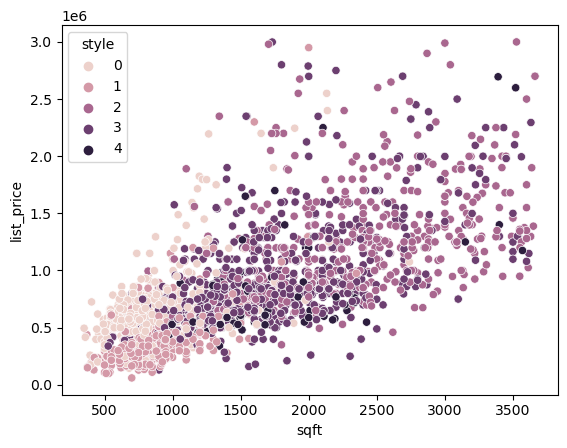

/Users/jayden/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jayden/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jayden/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


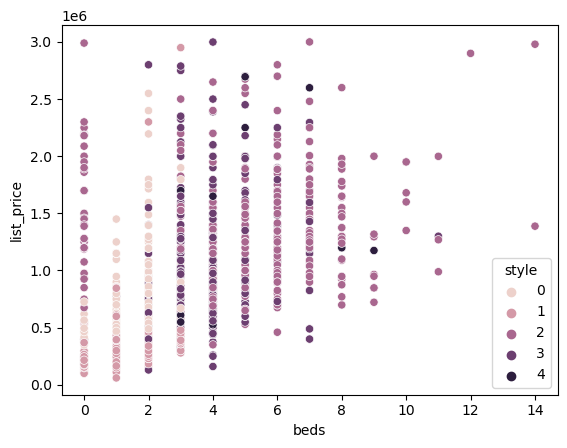

/Users/jayden/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jayden/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jayden/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


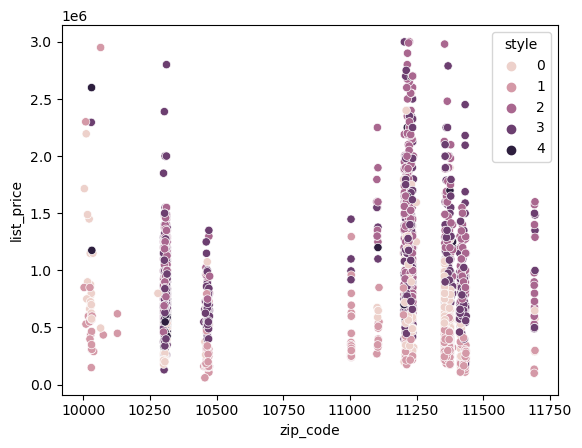

/Users/jayden/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jayden/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jayden/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


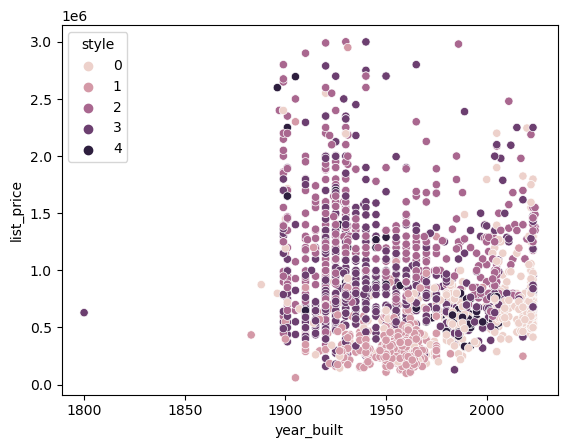

In [45]:
g = sns.scatterplot(filtered_df, x=filtered_df["sqft"], y=filtered_df['list_price'], hue=filtered_df['style'])
plt.show()

g = sns.scatterplot(filtered_df, x=filtered_df["beds"], y=filtered_df['list_price'], hue=filtered_df['style'])
plt.show()

g = sns.scatterplot(filtered_df, x=filtered_df["zip_code"], y=filtered_df['list_price'], hue=filtered_df['style'])
plt.show()

g = sns.scatterplot(filtered_df, x=filtered_df["year_built"], y=filtered_df['list_price'], hue=filtered_df['style'])
plt.show()

In [46]:
from huggingface_hub import notebook_login

notebook_login()

In [47]:
from datasets import Dataset, DatasetDict
from sklearn.model_selection import train_test_split

train, test = train_test_split(filtered_df, test_size=0.2)
tds = Dataset.from_pandas(train)
vds = Dataset.from_pandas(test)

ds = DatasetDict()

ds['train'] = tds
ds['validation'] = vds

/Users/jayden/anaconda3/lib/python3.11/site-packages/pyarrow/pandas_compat.py:373: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):


In [48]:
ds.push_to_hub(repo_id='ny_property_listings', private=True)


Pushing split train to the Hub.


Pushing dataset shards to the dataset hub:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/2 [00:00<?, ?ba/s]

Deleting unused files from dataset repository:   0%|          | 0/1 [00:00<?, ?it/s]

Pushing split validation to the Hub.


Pushing dataset shards to the dataset hub:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

Deleting unused files from dataset repository:   0%|          | 0/1 [00:00<?, ?it/s]